# Monday

Workflow:  using Jupyter notebooks as notes, along with a python class where functions will be written.

In [161]:
# my python file
import src.analytics as tics
from matplotlib import pyplot as plt
import seaborn as sns
import numpy as np
import scipy.stats as stats
from scipy.stats import kendalltau
tics

<module 'src.analytics' from '/Users/tbot/Dropbox/0_galvanize/0_TODAY/Analyzing-Network-Traffic_kdd99/src/analytics.py'>

1- create gh repo
	- get .gitignore

2- create Jupyter Notebook for data

3- create a python class and import it into jupyter

--- commit

4- pull down the data into the repo
    - modify gitignore to ignore the data
--- commit

### write function to use bash to create samples from the data set

-- commit

In [162]:
# On OSX requires brew install coreutils, using gshuf instead of shuf
sample_name = 'data/sample_random_subset.csv'

tics.create_random_samples('data/kddcup.data_10_percent', 10000, sample_name)

### Get some Initial metrics

In [163]:
# more imports
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

##### As the name list that accompanies the data set did not have all the field names, I cross referenced with a `sql` file at https://github.com/myui/hivemall/wiki/KDD-cup-1999-network-intrusion-dataset-%231 .  This matched the order displayed with the data set as well as with other tables out on the webs.

In [164]:
# Create list of column names
columns = ['duration',
           'protocol_type',
           'service',
           'flag',
           'src_bytes',
           'dst_bytes',
           'land',
           'wrong_fragment',
           'urgent',
           'hot',
           'num_failed_logins',
           'logged_in',
           'num_compromised',
           'root_shell',
           'su_attempted',
           'num_root',
           'num_file_creations',
           'num_shells',
           'num_access_files',
           'num_outbound_cmds',
           'is_host_login',
           'is_guest_login',
           'count',
           'srv_count',
           'serror_rate',
           'srv_serror_rate',
           'rerror_rate',
           'srv_rerror_rate',
           'same_srv_rate',
           'diff_srv_rate',
           'srv_diff_host_rate',
           'dst_host_count',
           'dst_host_srv_count',
           'dst_host_same_srv_rate',
           'dst_host_diff_srv_rate',
           'dst_host_same_src_port_rate',
           'dst_host_srv_diff_host_rate',
           'dst_host_serror_rate',
           'dst_host_srv_serror_rate',
           'dst_host_rerror_rate',
           'dst_host_srv_rerror_rate',
           'label']
df = pd.read_csv(sample_name, header=None)
df.columns = columns
df.head()

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,label
0,0,icmp,ecr_i,SF,1032,0,0,0,0,0,...,255,1.0,0.0,1.00,0.0,0.0,0.0,0.0,0.0,smurf.
1,0,icmp,ecr_i,SF,1032,0,0,0,0,0,...,255,1.0,0.0,1.00,0.0,0.0,0.0,0.0,0.0,smurf.
2,0,icmp,ecr_i,SF,1032,0,0,0,0,0,...,255,1.0,0.0,1.00,0.0,0.0,0.0,0.0,0.0,smurf.
3,0,icmp,ecr_i,SF,1032,0,0,0,0,0,...,255,1.0,0.0,1.00,0.0,0.0,0.0,0.0,0.0,smurf.
4,0,tcp,http,REJ,0,0,0,0,0,0,...,255,1.0,0.0,0.33,0.2,0.0,0.0,1.0,1.0,normal.


In [165]:
df.describe()

,duration,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,num_failed_logins,logged_in,num_compromised,...,dst_host_count,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate
count,10000.000000,1.000000e+04,10000.000000,10000.0000,10000.000000,10000.0,10000.000000,10000.000000,10000.000000,10000.000000,...,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,47.215400,1.427707e+03,727.995800,0.0001,0.006400,0.0,0.038600,0.000300,0.145400,0.004800,...,232.000800,187.800300,0.750120,0.031821,0.600878,0.006574,0.179163,0.178666,0.058046,0.057483
std,657.559207,5.148577e+04,10776.594944,0.0100,0.135502,0.0,0.805714,0.017319,0.352521,0.069119,...,65.581282,106.531573,0.412696,0.110391,0.480853,0.041059,0.382485,0.382836,0.230191,0.230012
min,0.000000,0.000000e+00,0.000000,0.0000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,4.400000e+01,0.000000,0.0000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,...,255.000000,33.000000,0.297500,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,5.200000e+02,0.000000,0.0000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,...,255.000000,255.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.000000,1.032000e+03,0.000000,0.0000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,...,255.000000,255.000000,1.000000,0.050000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,23825.000000,5.133876e+06,768318.000000,1.0000,3.000000,0.0,28.000000,1.000000,1.000000,1.000000,...,255.000000,255.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [166]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 42 columns):
duration                       10000 non-null int64
protocol_type                  10000 non-null object
service                        10000 non-null object
flag                           10000 non-null object
src_bytes                      10000 non-null int64
dst_bytes                      10000 non-null int64
land                           10000 non-null int64
wrong_fragment                 10000 non-null int64
urgent                         10000 non-null int64
hot                            10000 non-null int64
num_failed_logins              10000 non-null int64
logged_in                      10000 non-null int64
num_compromised                10000 non-null int64
root_shell                     10000 non-null int64
su_attempted                   10000 non-null int64
num_root                       10000 non-null int64
num_file_creations             10000 non-null int64
num_s

##### Count number of zero values in each column

In [167]:
df['dst_bytes'][df['dst_bytes'] == 0].count() / len(df)

0.827

### Some Histograms

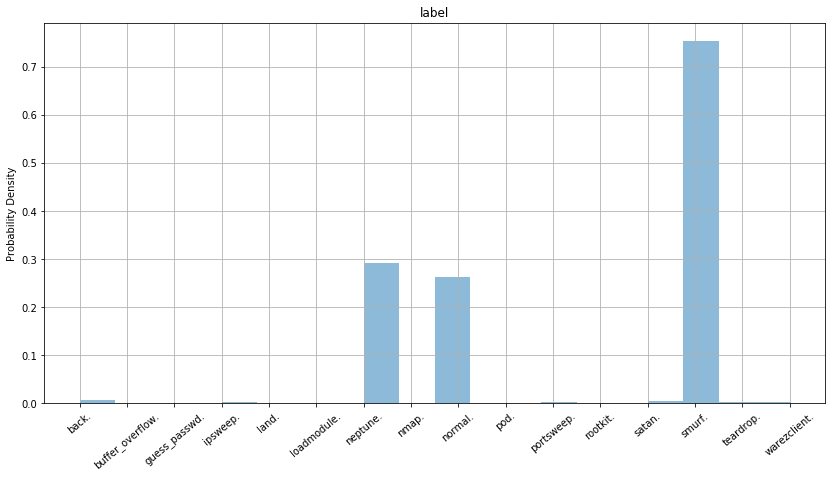

In [168]:
tics.plot_hist_basic(df, 'label')

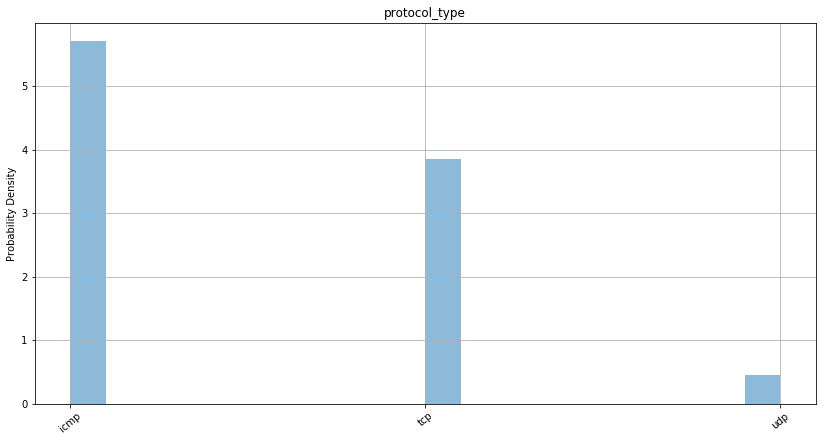

In [169]:
tics.plot_hist_basic(df, 'protocol_type')

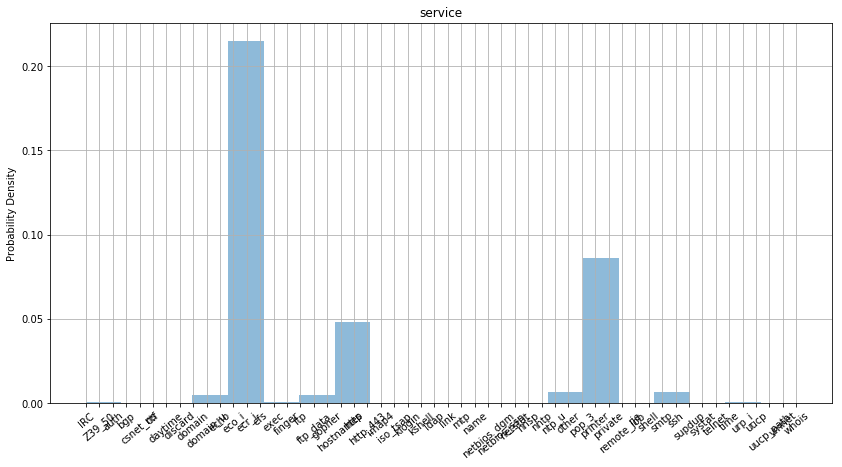

In [170]:
tics.plot_hist_basic(df, 'service')

In [171]:
# plot num_compromised against label?

# x_axis = df.label
# y_axis = df['num_compromised'].values

# plt.figure()
# plt.plot(x_axis, y_axis, 'r')
# plt.xlabel('Label')
# plt.ylabel('num_compromised')
# plt.title('Count of compromised per Label')
# plt.xticks(rotation=40)

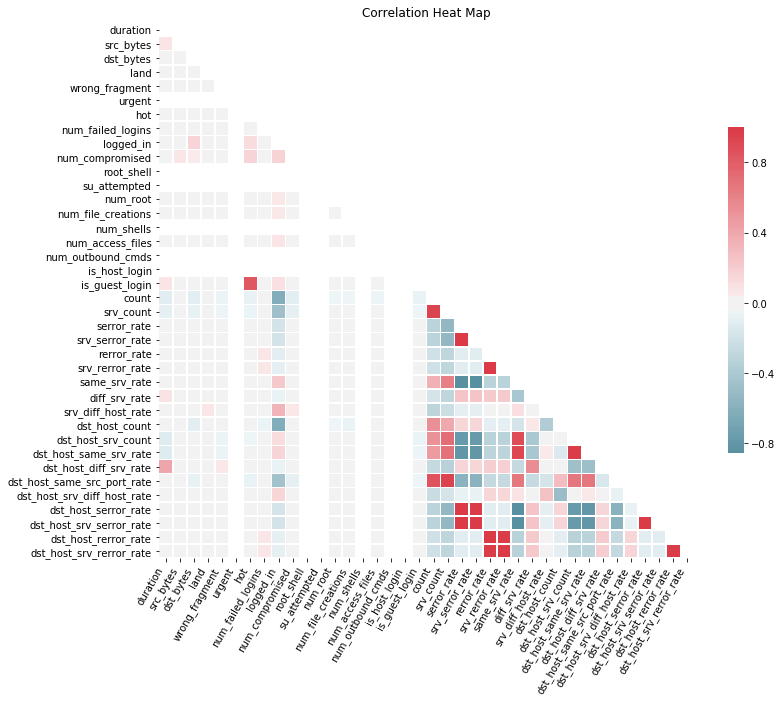

In [172]:
tics.corr_heat(df)

In [173]:
# unique values
df.label.unique()


array(['smurf.', 'normal.', 'neptune.', 'warezclient.', 'ipsweep.',
       'buffer_overflow.', 'back.', 'satan.', 'teardrop.', 'pod.',
       'portsweep.', 'guess_passwd.', 'loadmodule.', 'nmap.', 'rootkit.',
       'land.'], dtype=object)

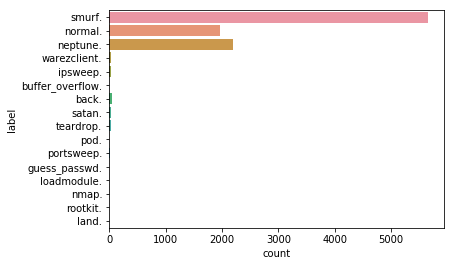

In [174]:
sns_plt = sns.countplot(y=df["label"])


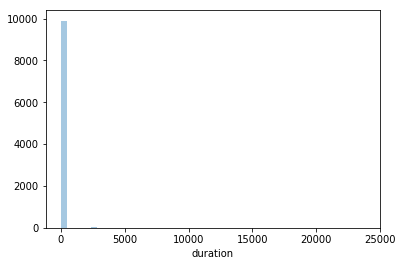

In [175]:
sns_plt = sns.distplot(df["duration"], kde=False)


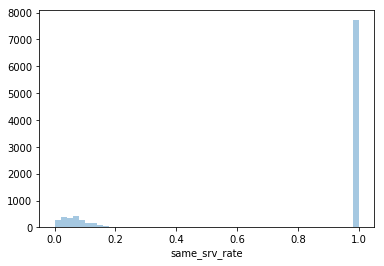

In [176]:
sns_plt = sns.distplot(df["same_srv_rate"], kde=False)


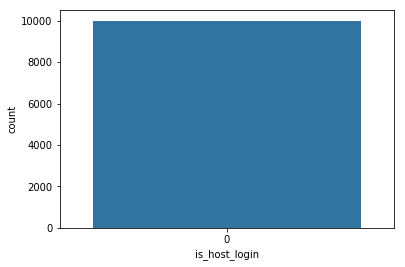

In [177]:
sns_plt = sns.countplot(x=df["is_host_login"])


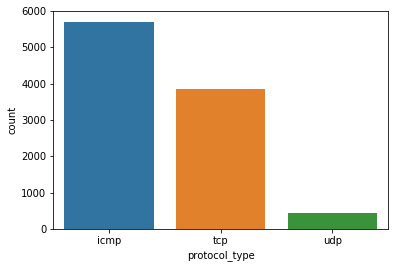

In [178]:
sns_plt = sns.countplot(df["protocol_type"])


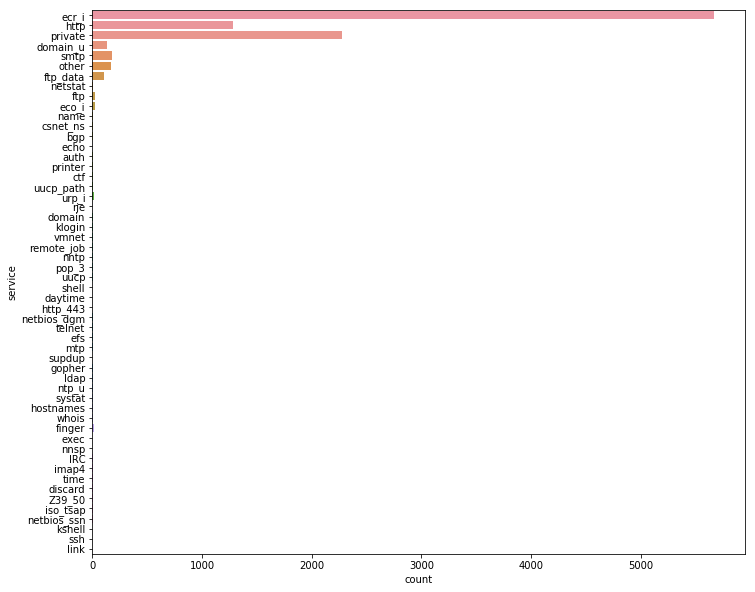

In [179]:
a4_dims = (11.7, 10)
fig, ax = plt.subplots(figsize=a4_dims)

sns_plt = sns.countplot(ax=ax,
                        y=df["service"])

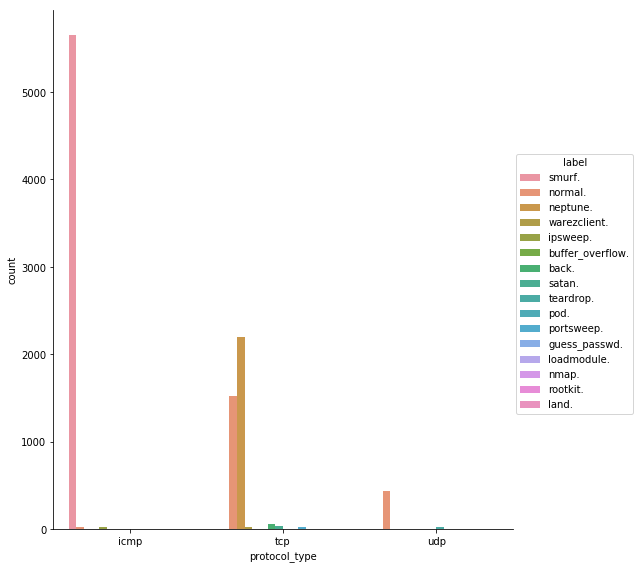

In [180]:
sns_plt = sns.factorplot(x='protocol_type', 
                         hue='label',
                         data=df,
                         kind='count',
                         size=8,
                         aspect=.9)